# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.
## Uso de regresion lineal

#### *Diego Alberto Baños Lopez*
#### *A01275100*



## Introducción

En este notebook se busca aplicar el concepto del algoritmo de regresion lineal con gradiente descendiente y ver como funcionan en un set de datos


## Parte 1: Lectura de datos en CSV
Para ello se requiere que leamos los datos y los almacenemos en una variable


In [153]:
# En caso de no tener instalado Pandas o numba favor de descomentar la siguiente linea de codigo
# !pip install -U pandas
# Pandas es usado para importar el CSV
import pandas as pd

# Los datos se pueden obtener de https://www.kaggle.com/datasets/athiramolps/ice-cream-sales-and-temperature
data = pd.read_csv("./IceCreamData.csv")
data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


## Parte 2: Declaracion de variables iniciales

Aqui para trabajar de una forma mas sencilla empezamos a declarar las variables dependientes e independientes de nuestros datos, asi como la declaración del learning rate (alpha) y de nuestros hiperparametros iniciales. (thetas), de igual forma como estamos usando el metodo de gradiente descendiente declararemos el numero de iteraciones que se realizaran para el modelo.

In [154]:
# Variables independientes
x = data["Temperature"]
# Variables dependientes
y = data["Revenue"]
theta = [0, 0]
alpha = 0.001
num_iteraciones = 1000

## Parte 3: Funciones para la regresión
Aqui empezamos a declarar las funciones a utilizar en este problema, en este primer caso se requiere declarar lo siguiente
### Funcion lambda
Esta función definida como $h(x_i)=\theta_0 + \theta_1x_i$ nos ayudara a medir la relacion entre las variables a analizar, o sea estimar el valor para un dato dado $(𝑥_i)$



In [155]:
# Función lambda para la función de hipótesis
h = lambda theta, x: theta[0] + theta[1] * x

## Parte 4: Calculos e iteraciones
A partir de este punto se empezara a calcular a partir de iteraciones controladas por un ciclo for el valor de la derivada de la función de costo (Recordando que la formula de la función de costo es $J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (h_\theta(x^{(i)}) - y^{(i)})^2$), que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$:

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Ademas de actualizar el valor de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [156]:
# Calcular el total de muestras a partir de los datos (n)
n = len(x)
for _ in range(num_iteraciones):
    # Calcular delta para theta0 y para cada muestra
    delta_theta0 = [h(theta, x[i]) - y[i] for i in range(n)]

    # Calcular delta para theta1 y para cada muestra
    delta_theta1 = [(h(theta, x[i]) - y[i]) * x[i] for i in range(n)]

    # Calcular sumatorias y promedio
    sum_delta_theta0 = sum(delta_theta0) / n
    sum_delta_theta1 = sum(delta_theta1) / n

    # Actualizar theta0 y theta1
    theta[0] = theta[0] - alpha * sum_delta_theta0
    theta[1] = theta[1] - alpha * sum_delta_theta1

## Parte 5: Predicciones y visualización
En esta parte y una vez realizado la regresion necesitamos ver algunas estimaciones para verificar que el modelo corre de manera correcta.

In [157]:
# Estimaciones
estimacion_12 = h(theta, 12)
estimacion_32 = h(theta, 32)

print(f"Estimación 1 (12 C): {estimacion_12} USD")
print(f"Estimación 2 (32 C): {estimacion_32} USD")


Estimación 1 (12 C): 281.71043637703247 USD
Estimación 2 (32 C): 741.6307920546404 USD


Una vez obtenido ello, observamos como se comporta el modelo realizado respecto a los datos reales con graficos

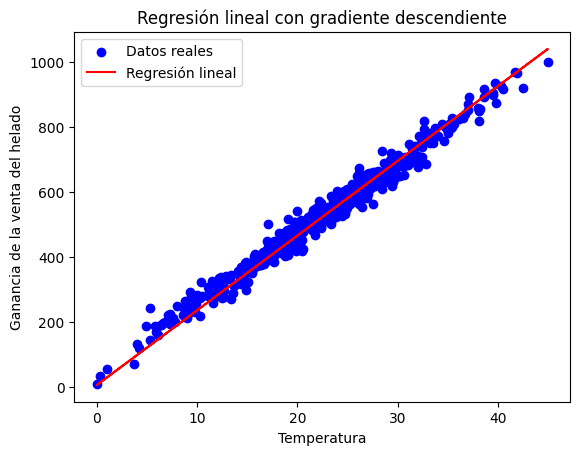

In [158]:
# Si no esta instalado matplotlib favor de descomentar esta linea de codigo:
# !pip install matplotlib

import matplotlib.pyplot as plt

# Gráfica de los datos
plt.scatter(x, y, color='blue', label='Datos reales')
# Gráfica de la regresión lineal
plt.plot(x, h(theta, x), color='red', label='Regresión lineal')
plt.xlabel('Temperatura')
plt.ylabel('Ganancia de la venta del helado')
plt.title('Regresión lineal con gradiente descendiente')
plt.legend()
plt.show()